In [37]:
import qsharp
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from utils import get_p_chapeau, get_phi_chapeau, get_precision, n_run

N_oracle fixe et nombre de shot varie

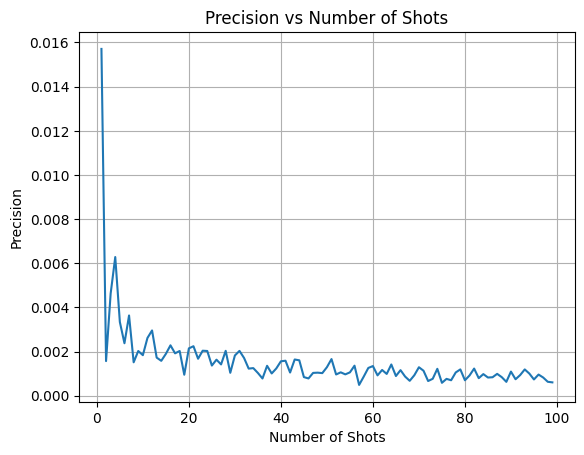

In [67]:
phi = 0
n_oracle = 100
shot_result = []
shots = []
for nb_shots in range(1, 100, 1):
    result = n_run(nShots=nb_shots, phi=phi, oraclePower=n_oracle, nb_run=10)
    shot_result.append(result)
    shots.append(nb_shots)

plt.plot(shots, shot_result)
plt.xlabel('Number of Shots')
plt.ylabel('Precision')
plt.title('Precision vs Number of Shots')
plt.grid(True)
plt.show()

N_shots fixe et nombre d'oracle varie

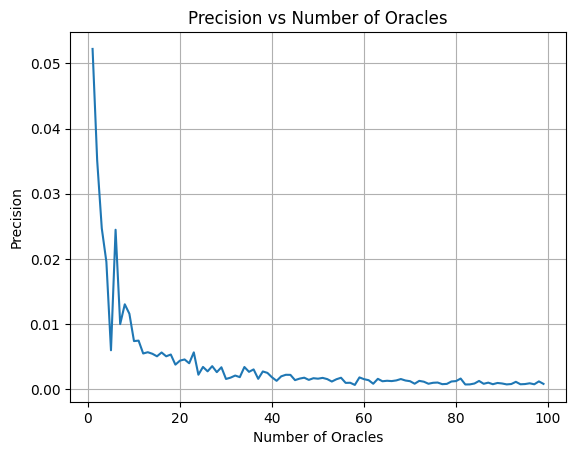

In [69]:
n_shots = 100
phi = 0
oracle_result = []
oracles = []
for nb_oracles in range(1, 100, 1):
    result = n_run(nShots=n_shots, phi=phi, oraclePower=nb_oracles, nb_run=10)
    oracle_result.append(result)
    oracles.append(nb_oracles)

plt.plot(oracles, oracle_result)
plt.xlabel('Number of Oracles')
plt.ylabel('Precision')
plt.title('Precision vs Number of Oracles')
plt.grid(True)
plt.show()

Faire des fits

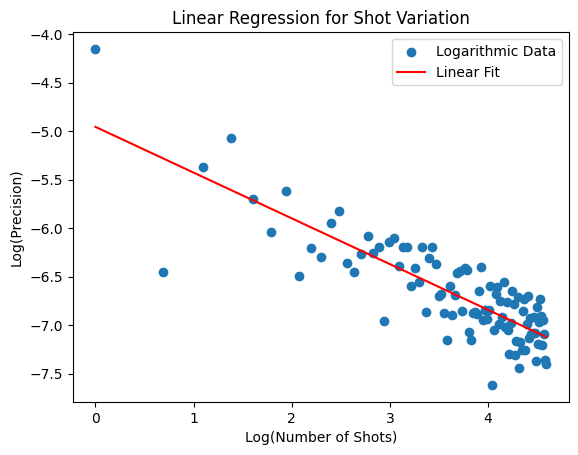

Alpha = -0.47156666175898876


In [68]:
shots_array = np.array(shots)
precision_array = np.array(shot_result)

# Logarithmic transformation
log_shots = np.log(shots_array)
log_precision = np.log(precision_array)

# Linear regression on the logarithmic data
slope, intercept, r_value, p_value, std_err = linregress(log_shots, log_precision)

# Plotting the logarithmic data and linear fit
plt.scatter(log_shots, log_precision, label='Logarithmic Data')
plt.plot(log_shots, intercept + slope * log_shots, label='Linear Fit', color='red')
plt.xlabel('Log(Number of Shots)')
plt.ylabel('Log(Precision)')
plt.title('Linear Regression for Shot Variation')
plt.legend()
plt.show()

# Printing the coefficient alpha
print("Alpha =", slope)

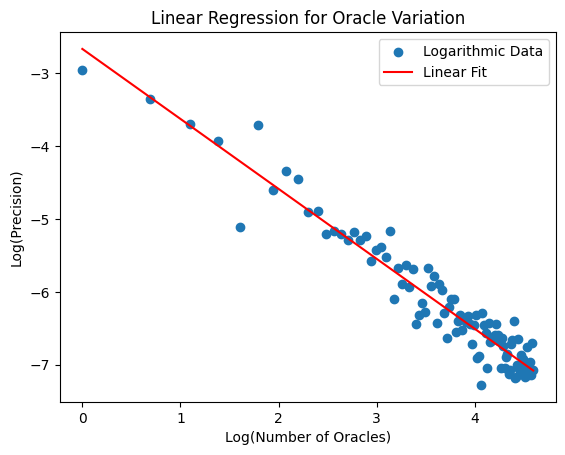

Alpha = -0.9607771813368535


In [70]:
shots_array = np.array(oracles)
precision_array = np.array(oracle_result)

# Logarithmic transformation
log_shots = np.log(shots_array)
log_precision = np.log(precision_array)

# Linear regression on the logarithmic data
slope, intercept, r_value, p_value, std_err = linregress(log_shots, log_precision)

# Plotting the logarithmic data and linear fit
plt.scatter(log_shots, log_precision, label='Logarithmic Data')
plt.plot(log_shots, intercept + slope * log_shots, label='Linear Fit', color='red')
plt.xlabel('Log(Number of Oracles)')
plt.ylabel('Log(Precision)')
plt.title('Linear Regression for Oracle Variation')
plt.legend()
plt.show()

# Printing the coefficient alpha
print("Alpha =", slope)